<a href="https://colab.research.google.com/github/OscarBedford/MLCourse_Weekly_Exercises/blob/main/DL_Homework1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [257]:
import torch
import numpy as np
from torch import nn
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import pandas as pd
import matplotlib.pyplot as plt

In [258]:
import requests
from pathlib import Path 

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping download


In [259]:
torch.manual_seed(42)
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [260]:
num_samples = 1000

# Generate data
r = np.random.normal(0, 1, num_samples)
t = np.random.uniform(0, 2*np.pi, num_samples)
x1 = np.where(np.arange(num_samples)%2==0, r*np.cos(t), (r + 5)*np.cos(t))
x2 = np.where(np.arange(num_samples)%2==0, r*np.sin(t), (r + 5)*np.sin(t))

# Generate y
y = np.where(np.arange(num_samples)%2==0, 0, 1)

# Combine x1 and x2 into matrix 'X', and then add into matrix 'data' with y

X = np.column_stack((x1, x2))

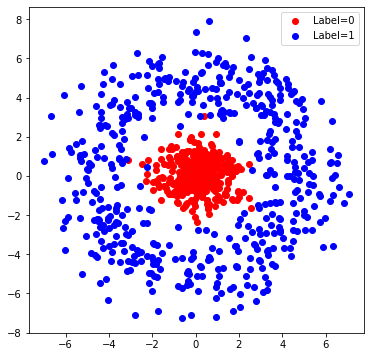

In [266]:
# Plot the data
plt.figure(figsize=(6, 6))
plt.scatter(x1[y == 0], x2[y == 0], c="r", label='Label=0')
plt.scatter(x1[y == 1], x2[y == 1], c= "b", label='Label=1')
plt.legend()
plt.show()

In [239]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Split training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25)

print(len(X_train), len(X_val), len(X_test),len(y_train),len(y_val),len(y_test))

600 200 200 600 200 200


In [240]:
X_train_tensor = torch.from_numpy(X_train)
y_train_tensor = torch.from_numpy(y_train)
X_val_tensor = torch.from_numpy(X_val)
y_val_tensor = torch.from_numpy(y_val)
X_test_tensor = torch.from_numpy(X_test)
y_test_tensor = torch.from_numpy(y_test)

In [241]:
train = [X_train, y_train]
val = [X_val, y_val]

In [242]:
# X_train and y_train are your input and output data, respectively
train_dataset = torch.utils.data.TensorDataset(torch.Tensor(X_train), torch.Tensor(y_train))
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=25, shuffle=True)

# X_train and y_train are your input and output data, respectively
val_dataset = torch.utils.data.TensorDataset(torch.Tensor(X_val), torch.Tensor(y_val))
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=25, shuffle=True)

In [243]:
# Let's take a look at what one epoch of training would look like
num_epoch = 1
for epoch in range(num_epoch):
    for i, (x, y) in enumerate(train_loader):
        print(i, x.shape)

0 torch.Size([25, 2])
1 torch.Size([25, 2])
2 torch.Size([25, 2])
3 torch.Size([25, 2])
4 torch.Size([25, 2])
5 torch.Size([25, 2])
6 torch.Size([25, 2])
7 torch.Size([25, 2])
8 torch.Size([25, 2])
9 torch.Size([25, 2])
10 torch.Size([25, 2])
11 torch.Size([25, 2])
12 torch.Size([25, 2])
13 torch.Size([25, 2])
14 torch.Size([25, 2])
15 torch.Size([25, 2])
16 torch.Size([25, 2])
17 torch.Size([25, 2])
18 torch.Size([25, 2])
19 torch.Size([25, 2])
20 torch.Size([25, 2])
21 torch.Size([25, 2])
22 torch.Size([25, 2])
23 torch.Size([25, 2])


In [244]:
# Let's take a look at what one epoch of validation would look like
num_epoch = 1
for epoch in range(num_epoch):
    for i, (x, y) in enumerate(val_loader):
        print(i, x.shape)

0 torch.Size([25, 2])
1 torch.Size([25, 2])
2 torch.Size([25, 2])
3 torch.Size([25, 2])
4 torch.Size([25, 2])
5 torch.Size([25, 2])
6 torch.Size([25, 2])
7 torch.Size([25, 2])


In [245]:
# We will subclass nn.Module to define our model 
class CircleModel(nn.Module):
    def __init__(self, inner_units, hidden_units):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=inner_units, out_features=hidden_units)
        self.relu = nn.ReLU()
        self.layer_2 = nn.Linear(in_features=hidden_units, out_features=1)

    def forward(self, x):
        x = self.layer_1(x)
        x = self.relu(x) # We make sure the activation function of the hidden layer is ReLU
        x = self.layer_2(x)
        return (x) # We make sure the activation function of the outer layer is sigmoid

torch.manual_seed(42)
model = CircleModel(inner_units=2, hidden_units=30).to(device)
model = model.to(device)

In [246]:
# We define our loss function, optimizer and learning rate
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model.parameters(),
                            lr = 0.01)

In [247]:
# We define an appropriate accuracy metric 
def accuracy_fn(y_true, y_pred): 
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct/len(y_pred)) * 100
    return acc

In [248]:
## 3. Train model

torch.manual_seed(42)
epochs = 100

for epoch in range(epochs):
    for i, (X, y) in enumerate(train_loader):

        X, y = X.to(device), y.to(device)

        model.train()
        optimizer.zero_grad()

        y_logits = model(X).squeeze()
        y_pred = torch.round(torch.sigmoid(y_logits))

        loss = loss_fn(y_logits, y)
        acc = accuracy_fn(y, y_pred)

        loss.backward()
        optimizer.step()

    # validation/test
    for i, (X, y) in enumerate(val_loader):

        X, y = X.to(device), y.to(device)

        model.eval() 
        with torch.no_grad():
            
            val_logits = model(X).squeeze()
            val_pred = torch.round(torch.sigmoid(val_logits))
            
            val_loss = loss_fn(val_logits, y)
            val_acc = accuracy_fn(y, val_pred)

    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Training Loss: {loss:.4f} | Training accuracy: {acc:.2f} | Validation loss: {val_loss:.4f} | Validation accuracy: {val_acc:.2f}")

Epoch: 0 | Training Loss: 0.6934 | Training accuracy: 32.00 | Validation loss: 0.6411 | Validation accuracy: 52.00
Epoch: 10 | Training Loss: 0.3653 | Training accuracy: 100.00 | Validation loss: 0.3599 | Validation accuracy: 92.00
Epoch: 20 | Training Loss: 0.2135 | Training accuracy: 100.00 | Validation loss: 0.2822 | Validation accuracy: 100.00
Epoch: 30 | Training Loss: 0.1578 | Training accuracy: 100.00 | Validation loss: 0.2054 | Validation accuracy: 100.00
Epoch: 40 | Training Loss: 0.1031 | Training accuracy: 100.00 | Validation loss: 0.1636 | Validation accuracy: 96.00
Epoch: 50 | Training Loss: 0.0979 | Training accuracy: 100.00 | Validation loss: 0.1140 | Validation accuracy: 100.00
Epoch: 60 | Training Loss: 0.1404 | Training accuracy: 92.00 | Validation loss: 0.1348 | Validation accuracy: 96.00
Epoch: 70 | Training Loss: 0.0925 | Training accuracy: 96.00 | Validation loss: 0.0885 | Validation accuracy: 100.00
Epoch: 80 | Training Loss: 0.0568 | Training accuracy: 100.00 | 

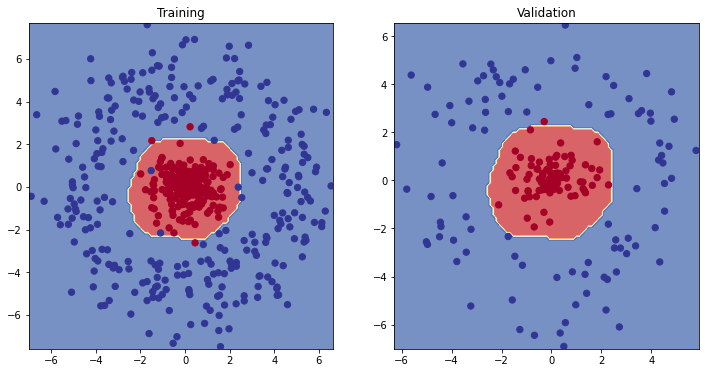

In [249]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Training")
plot_decision_boundary(model, X_train_tensor, y_train_tensor)
plt.subplot(1, 2, 2)
plt.title("Validation")
plot_decision_boundary(model, X_val_tensor, y_val_tensor)